# **Model Evaluation Techniques**


In [1]:
# Import the packages

import pandas as pd
import numpy as np
import itertools


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import os

# Any results you write to the current directory are saved as output.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the dataset**

In [3]:
import pandas as pd

df = pd.read_csv('//content/drive/MyDrive/DmKd Sees/project/01. bank-additional-full.csv', sep=";")

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 41188 rows and 21 columns.


In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Data Preprocessing**

Checking for null values

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
pre_df = df.copy()
pre_df.drop(['contact','month','day_of_week','default','pdays',],axis=1,inplace=True)
pre_df.head(10)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,198,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,no,no,217,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,yes,no,380,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,yes,no,50,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
pre_df=df.copy
df["job"] = df["job"].apply(lambda x: 0 if x=="admin" else (1 if x=="blue-collar" else (2 if x=="entrepreneur" else (3 if x=="housemaid" else (4 if x=="management" else (5 if x=="retired" else (6 if x=="self-employed" else (7 if x=="services" else (8 if x=="student" else (9 if x=="technician" else (10 if x=="unemployed" else (11 if x=="unknown")))))))))))

SyntaxError: ignored

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(pre_df):
    pre_df1=pre_df.copy()
    categ=['housing','loan','poutcome','job','marital','education']
    le = LabelEncoder()
    pre_df1[categ] = pre_df1[categ].apply(le.fit_transform)
  
    
    return pre_df1

In [11]:
pre_df1 = preprocess_data(pre_df)
pre_df1.head(10)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,0,0,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,2,0,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,2,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
5,45,7,1,2,0,0,198,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
6,59,0,1,5,0,0,139,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
7,41,1,1,7,0,0,217,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
8,24,9,2,5,2,0,380,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
9,25,7,2,3,2,0,50,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:

pre_df1["y"] = pre_df1["y"].apply(lambda x: 0 if x=="no" else 1)

In [13]:
pre_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   housing         41188 non-null  int64  
 5   loan            41188 non-null  int64  
 6   duration        41188 non-null  int64  
 7   campaign        41188 non-null  int64  
 8   previous        41188 non-null  int64  
 9   poutcome        41188 non-null  int64  
 10  emp.var.rate    41188 non-null  float64
 11  cons.price.idx  41188 non-null  float64
 12  cons.conf.idx   41188 non-null  float64
 13  euribor3m       41188 non-null  float64
 14  nr.employed     41188 non-null  float64
 15  y               41188 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 5.0 MB


# **Exploring the dataset**



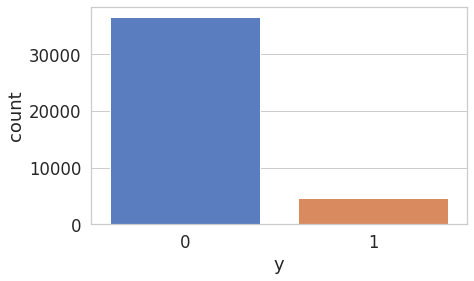

In [14]:
sns.countplot(x='y',data=pre_df1)
plt.show()

In [16]:
grouped = pre_df1.groupby('y').agg({'age':['mean', 'std', min, max], 
                                       'job':['mean', 'std', min, max],
                                       'marital':['mean', 'std', min, max],
                                       'education':['mean', 'std', min, max],
                                       'housing':['mean', 'std', min, max],
                                       'loan':['mean', 'std', min, max],
                                       'duration':['mean', 'std', min, max],
                                       'campaign':['mean', 'std', min, max],
                                       'previous':['mean', 'std', min, max],
                                       'poutcome':['mean', 'std', min, max],
                                       'emp.var.rate':['mean', 'std', min, max],
                                       'cons.price.idx':['mean', 'std', min, max],
                                       'cons.conf.idx':['mean', 'std', min, max],
                                       'euribor3m':['mean', 'std', min, max],
                                       'nr.employed':['mean', 'std', min, max]
                                      })
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped # or grouped.T

,age_mean,age_std,age_min,age_max,job_mean,job_std,job_min,job_max,marital_mean,marital_std,marital_min,marital_max,education_mean,education_std,education_min,education_max,housing_mean,housing_std,housing_min,housing_max,loan_mean,loan_std,loan_min,loan_max,duration_mean,duration_std,duration_min,duration_max,campaign_mean,campaign_std,campaign_min,campaign_max,previous_mean,previous_std,previous_min,previous_max,poutcome_mean,poutcome_std,poutcome_min,poutcome_max,emp.var.rate_mean,emp.var.rate_std,emp.var.rate_min,emp.var.rate_max,cons.price.idx_mean,cons.price.idx_std,cons.price.idx_min,cons.price.idx_max,cons.conf.idx_mean,cons.conf.idx_std,cons.conf.idx_min,cons.conf.idx_max,euribor3m_mean,euribor3m_std,euribor3m_min,euribor3m_max,nr.employed_mean,nr.employed_std,nr.employed_min,nr.employed_max
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39.911185,9.898132,17,95,3.692405,3.587166,0,11,1.162745,0.605246,0,3,3.703185,2.133889,0,7,1.067664,0.985539,0,2,0.328691,0.724706,0,2,220.844807,207.096293,0,4918,2.633085,2.873438,1,56,0.132374,0.409199,0,7,0.913319,0.324626,0,2,0.248875,1.482932,-3.4,1.4,93.603757,0.558993,92.201,94.767,-40.593097,4.391155,-50.8,-26.9,3.811491,1.638187,0.634,5.045,5176.166600,64.571979,4963.6,5228.1
1,40.913147,13.837476,17,98,3.978017,3.642749,0,11,1.251724,0.631498,0,3,4.093750,2.125418,0,7,1.103664,0.983057,0,2,0.317457,0.714972,0,2,553.191164,401.171871,37,4199,2.051724,1.666245,1,23,0.492672,0.860344,0,6,1.062284,0.565022,0,2,-1.233448,1.623626,-3.4,1.4,93.354386,0.676644,92.201,94.767,-39.789784,6.139668,-50.8,-26.9,2.123135,1.742598,0.634,5.045,5095.115991,87.572641,4963.6,5228.1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

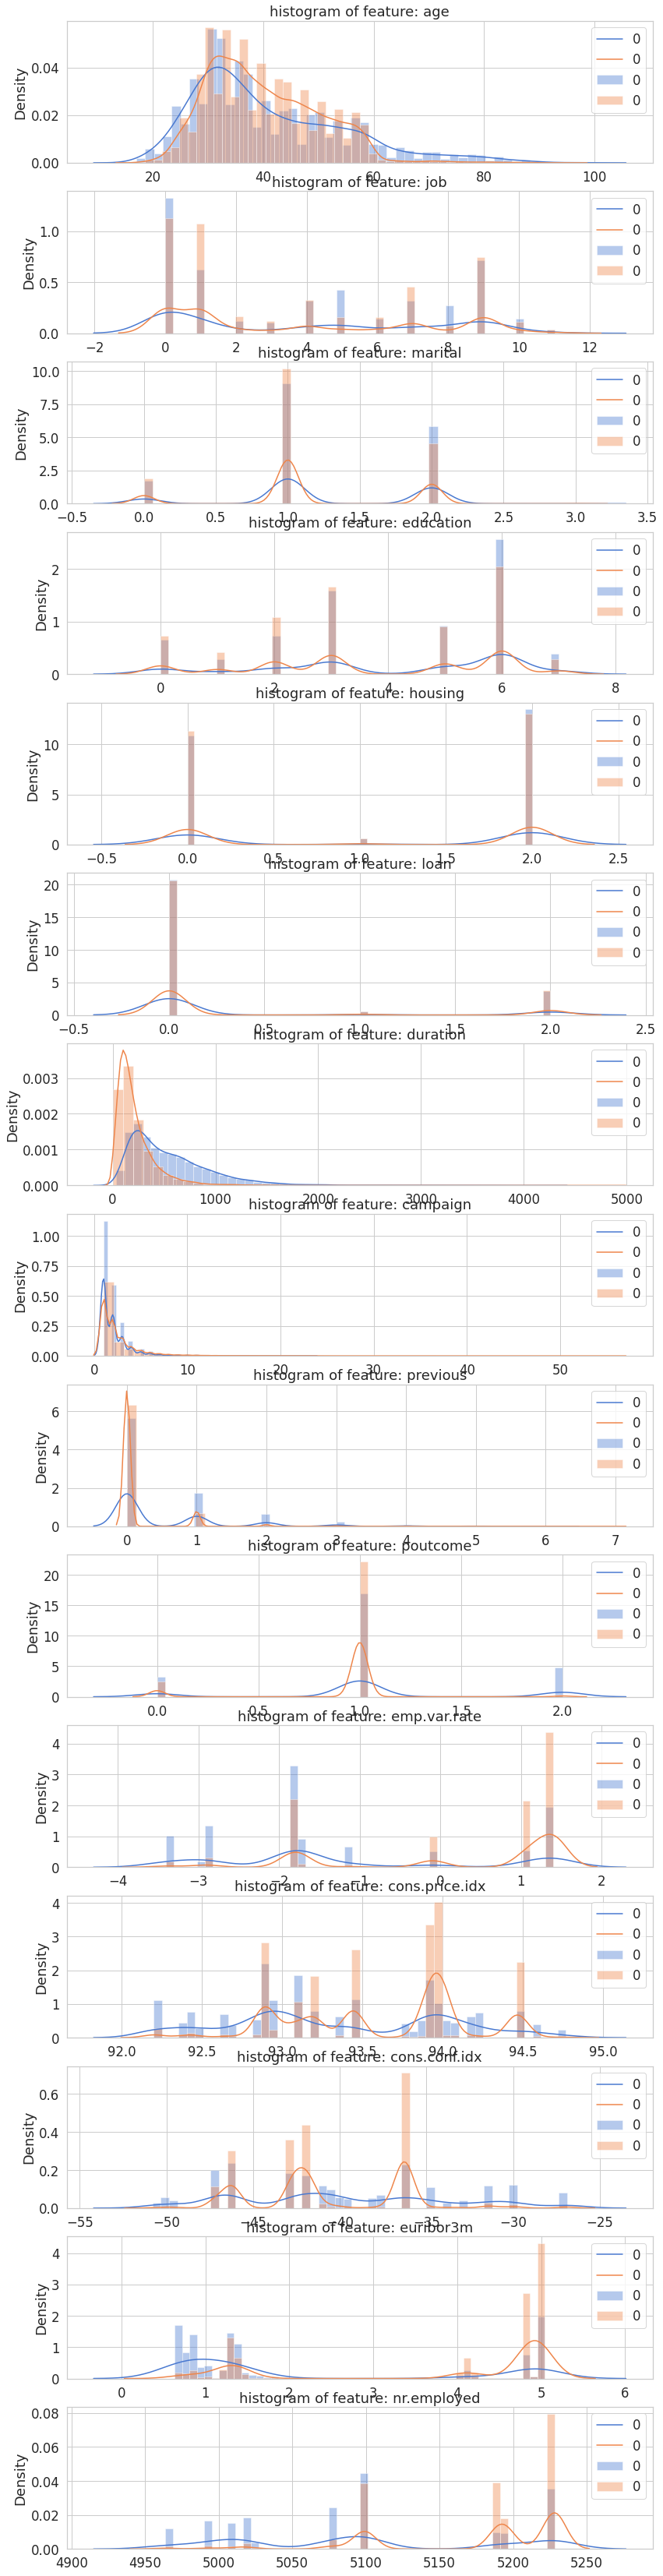

In [21]:
plt.subplots_adjust(top=5)
columns=pre_df1.columns[:15]
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(pre_df1[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(pre_df1[cn][pre_df1.y == 1], bins=50)
    sns.distplot(pre_df1[cn][pre_df1.y == 0], bins=50)
    ax.set_xlabel('')
    plt.legend(pre_df1["y"])
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

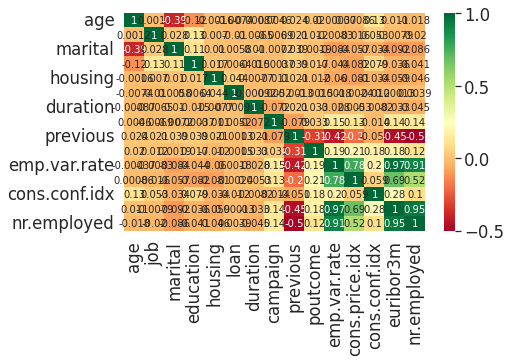

In [22]:
sns.heatmap(pre_df1[pre_df1.columns[:15]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

# **Model Building**

In [23]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# **Methods for evaluating the performance of a Classifier**


## **Holdout Method**

In [24]:
y=pre_df1['y']
data=pre_df1[pre_df1.columns[:15]]

train,test=train_test_split(pre_df1,test_size=0.25,random_state=0,stratify=pre_df1['y'])# stratify the outcome

train_X=train[train.columns[:15]]
test_X=test[test.columns[:15]]
train_Y=train['y']
test_Y=test['y']

In [25]:
print(train_X.shape)
print(test_X.shape)

(30891, 15)
(10297, 15)


### **Feature Centering and Scaling**

train_X and test_X datasets are centered to zero and normalized by the std dev. This helps in faster gradient descent.


In [26]:
features = train_X.columns.values

for feature in features:
    mean, std = pre_df1[feature].mean(), pre_df1[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

### **Compare model accuracies**

In [27]:
accuracy_scores=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    accuracy_scores.append(metrics.accuracy_score(prediction,test_Y))
    
models_dataframe=pd.DataFrame(accuracy_scores,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Random forest,0.911722
Logistic Regression,0.907837
Radial Svm,0.905021
Linear Svm,0.901428
KNN,0.893658
Decision Tree,0.888317
Naive Bayes,0.830048


In [28]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
predictionRF=modelRF.predict(test_X)
pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)

duration          0.331237
euribor3m         0.121737
age               0.104511
nr.employed       0.079238
job               0.053045
education         0.048279
campaign          0.047699
poutcome          0.046208
cons.conf.idx     0.034200
emp.var.rate      0.027982
cons.price.idx    0.026115
marital           0.025859
housing           0.021124
loan              0.016419
previous          0.016346
dtype: float64

## **k-fold Cross validation**

In [29]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.preprocessing import StandardScaler #Standardisation

In [30]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10 splits the data into 10 equal parts

In [31]:
# Starting with the original dataset and then doing centering and scaling
features=pre_df1[pre_df1.columns[:15]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
X=pd.DataFrame(features_standard,columns=['	age', 'job', 'marital', 'education', 'housing',
                                           'loan', 'duration', 'campaign','previous','poutcome',
                                          'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
X['y']=df['y']

In [32]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:15]], X['y'], cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)   
cv_models_dataframe.columns=['CV Mean']    
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Random forest,0.912135
Radial Svm,0.909561
Logistic Regression,0.908638
Linear Svm,0.904268
KNN,0.896669
Decision Tree,0.888293
Naive Bayes,0.832888


# **Comparing data mining methods**

In [33]:
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T

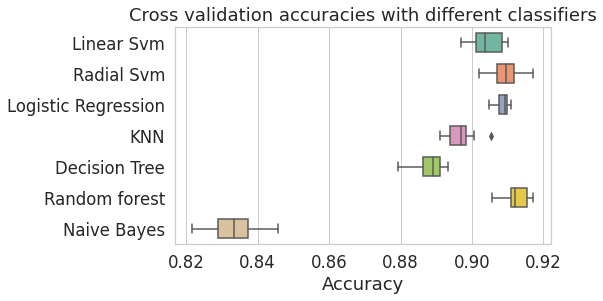

In [34]:
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

# **Ensembling**

In [36]:
linear_svm=svm.SVC(kernel='linear',C=0.1,gamma=10, probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10, probability=True)
lr=LogisticRegression(C=0.1)

In [37]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

## **Ensamble with 3 classifiers combined: Linear SVM, radial SVM, Log Reg**

In [38]:
ensembleModel=VotingClassifier(estimators=[('Linear_svm',linear_svm), ('Radial_svm', radial_svm), ('Logistic Regression', lr)], 
                                            voting='soft', weights=[1,2,3])

ensembleModel.fit(train_X,train_Y)
predictEnsemble = ensembleModel.predict(test_X)

In [39]:
print('Accuracy of ensembled model with all the 3 classifiers is:', np.round(ensembleModel.score(test_X,test_Y), 4))

Accuracy of ensembled model with all the 3 classifiers is: 0.9032


# **ROC curve with AUC**

In [40]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

### **For the ensembling method**

In [41]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, predictEnsemble)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6199317949375975

Text(0.5, 0, 'False Positive Rate')

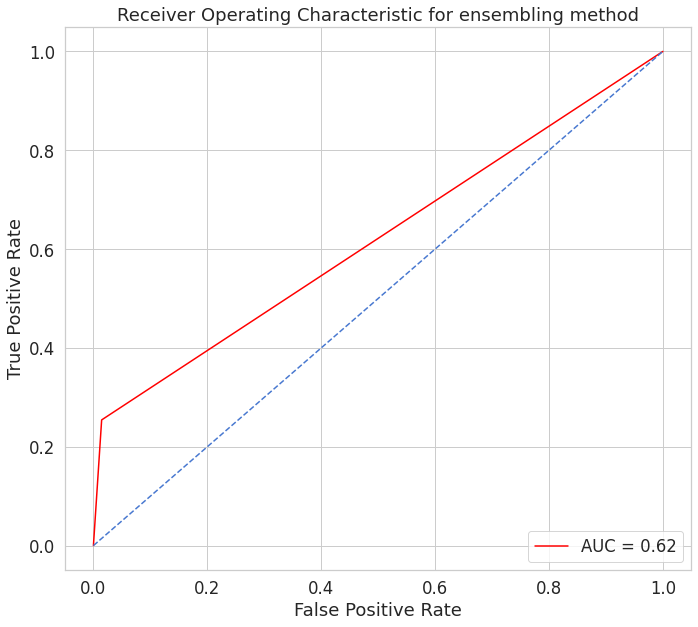

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for ensembling method')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **For all methods**

In [43]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(train_X,train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(train_X,train_Y)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(train_X,train_Y)
y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(train_X,train_Y)
y_pred_prob_nb = modelNB.predict_proba(test_X)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)

# Ensamble 
y_pred_prob_en = ensembleModel.predict_proba(test_X)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(test_Y, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(test_Y, y_pred_prob_en)

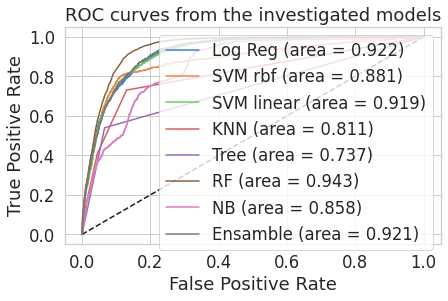

In [44]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_en, tpr_en, label='Ensamble (area = %0.3f)' % roc_auc_en)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

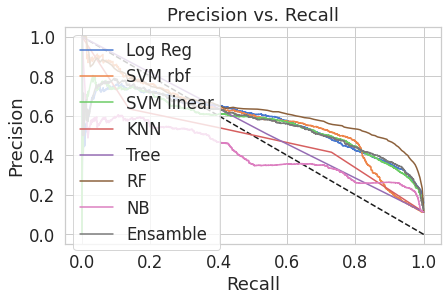

In [45]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.plot(recall_en, precision_en, label='Ensamble')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

# **Predictive Outcomes**

## **Confusion matrix with ensamble model**

Let us look at the confusion matrix from the ensamble classifier.
First define a function to plot confusion matrix

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

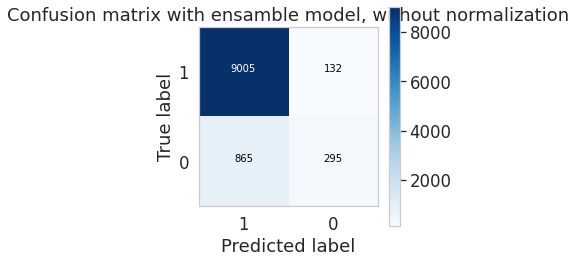

In [47]:
class_names = test_Y.unique()
cmEnsamble = confusion_matrix(test_Y, predictEnsemble)
plt.grid(False)
plot_confusion_matrix(cmEnsamble, classes=class_names, title='Confusion matrix with ensamble model, without normalization')


## **Classification Report**

In [48]:
print(metrics.classification_report(test_Y, predictEnsemble))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9137
           1       0.69      0.25      0.37      1160

    accuracy                           0.90     10297
   macro avg       0.80      0.62      0.66     10297
weighted avg       0.89      0.90      0.88     10297



# **Cost-sensitive learning**

## **Diabetes prediction using Neural Network with Keras**

Keras is a high level frame work for running neural network applications. It runs tensorflow at the backend.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# fix random seed for reproducibility
np.random.seed(42)

In [50]:
train_Y = to_categorical(train_Y, num_classes = 2)
test_Y = to_categorical(test_Y, num_classes = 2)

In [51]:
# Confirm the train-test split ratio
print(np.shape(train_X))
print(np.shape(train_Y))
print(np.shape(test_X))
print(np.shape(test_Y))

(30891, 15)
(30891, 2)
(10297, 15)
(10297, 2)


## **1. Create the model using Keras**



In [54]:
model = Sequential()
model.add(Dense(15, input_dim=15, activation='relu'))
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                240       
                                                                 
 dense_7 (Dense)             (None, 12)                192       
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 738
Trainable params: 738
Non-trainable 

## **2. Compile the model**



In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **3. Fit model**

We train the model by calling fit() on training data.
The number of iteration through the whole training datset is called "epoch". It is set to 150 (higher the better).
The number of instances that are evaluated before a weight update in the network is performed is the the batch size. It is set to 50 (relatively small, the dataset is also small).

With the model.fit(), we shall also capture the accuracy each epoch.


In [57]:
epoch = 150
batch_size = 50

history = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epoch, 
          validation_data = (test_X, test_Y), verbose = 2)

Epoch 1/150
618/618 - 2s - loss: 0.2641 - accuracy: 0.8873 - val_loss: 0.2143 - val_accuracy: 0.8873 - 2s/epoch - 4ms/step
Epoch 2/150
618/618 - 1s - loss: 0.2085 - accuracy: 0.9046 - val_loss: 0.2078 - val_accuracy: 0.9078 - 1s/epoch - 2ms/step
Epoch 3/150
618/618 - 1s - loss: 0.2030 - accuracy: 0.9095 - val_loss: 0.2031 - val_accuracy: 0.9097 - 1s/epoch - 2ms/step
Epoch 4/150
618/618 - 1s - loss: 0.1995 - accuracy: 0.9103 - val_loss: 0.2014 - val_accuracy: 0.9094 - 1s/epoch - 2ms/step
Epoch 5/150
618/618 - 1s - loss: 0.1973 - accuracy: 0.9123 - val_loss: 0.2004 - val_accuracy: 0.9087 - 1s/epoch - 2ms/step
Epoch 6/150
618/618 - 1s - loss: 0.1946 - accuracy: 0.9121 - val_loss: 0.1995 - val_accuracy: 0.9078 - 1s/epoch - 2ms/step
Epoch 7/150
618/618 - 1s - loss: 0.1931 - accuracy: 0.9121 - val_loss: 0.2000 - val_accuracy: 0.9057 - 1s/epoch - 2ms/step
Epoch 8/150
618/618 - 1s - loss: 0.1918 - accuracy: 0.9138 - val_loss: 0.1985 - val_accuracy: 0.9071 - 1s/epoch - 2ms/step
Epoch 9/150
618/

## **4. Evaluate model**

We evaluate the model on test dataset and obtain the score and accuracy.
Score is the evaluation of the loss function for a given input.


In [58]:
score, acc = model.evaluate(test_X, test_Y)
print('Test score:', score)
print('Test accuracy:', acc)

322/322 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9139
Test score: 0.18990543484687805
Test accuracy: 0.9138584136962891


### **Training and validation curves vs. epoch**

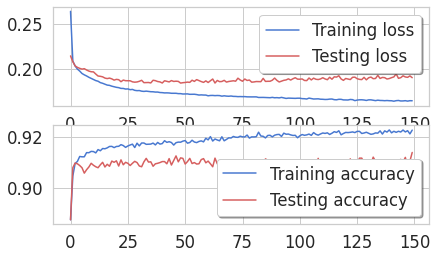

In [59]:
# Plot the loss and accuracy curves for training and validation vs. epochs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

### **Confusion matrix using this model**

Let us have a look at the correct and misclasssification in the confusion matrix.
I am using the below function for confusion matrix.

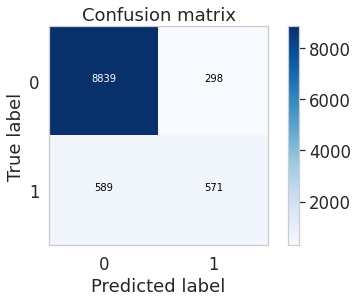

In [60]:
# Predict the values from the validation dataset
Y_pred = model.predict(test_X)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_Y,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.grid(False)
plt.show()